### Ridge & Lasso Regression
### Regularization
            Regularization is a technique to reduce overfitting by penalizing large coefficients.
            Instead of only minimizing error, we also control model complexity.
                             Loss=Error+Penalty
## Why Regularization is needed.
      > Too many features
      > Polynomial regression
      > multicollinearity
      > Noisy Data
## Types of Regularization

      > L1 Regularization(Lasso Regression)
      > L2 Regularization(Ridge regression)
      > Elastic Net(L1+L2)

### Ridge regression
           It is a regularization technique used to reduce overfitting by adding a penalty term based on the square of coefficients to the loss function.
                 Loss = MSE + λ * Σ(wᵢ²)
### Why Ridge Regression is Needed
    > LInear and polynomial models to overfit
    > large Coefficients make the model unstable
    > Multicollinearity causes coefficient fluctuation
Note: Ridge controls model complexity

### Lasso regression (L1 Regularization)
          it is a regularization technique used to reduce overfitting by adding a penalty based on the absolute value of coefficients, which can force some coefficients to become exactly zero.
           LASSO: Least Absolute Shrinkage and Selection Operator
                       Loss = MSE + λ * Σ|wᵢ|
## Why Lasso regression is needed
           > Some datasets contain irrelevant or noisy features
           > Too many features increase model complexity
           > Difficult tp interpret models with many coefficients 
NOTE: Lasso Simplifies the model by removing  unnecessary features
### use ridge when:
    > Many correlated features 
    > All Variables are important
### Use Lasso When: 
    > Too many features 
    > Need feature selection
    
           

    


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,LinearRegression,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [15]:
data= {
    "Area" : [800,900,1000,1100,1200,1300,1400,1500,1600,1700],
    "Bedrooms" :[ 1,2,2,2,3,3,3,4,4,4],
    "Bathrooms" : [1,1,2,2,2,2,3,3,3,3],
    "Age": [15,12,10,8,6,5,4,3,2,1],
    "Distance_City" : [15,14,13,12,10,9,8,7,6,5],
    "Price" : [40,50,55,60,70,75,80,90,95,100]
}
data
df=pd.DataFrame(data)
df

,Area,Bedrooms,Bathrooms,Age,Distance_City,Price
0,800,1,1,15,15,40
1,900,2,1,12,14,50
2,1000,2,2,10,13,55
3,1100,2,2,8,12,60
4,1200,3,2,6,10,70
5,1300,3,2,5,9,75
6,1400,3,3,4,8,80
7,1500,4,3,3,7,90
8,1600,4,3,2,6,95
9,1700,4,3,1,5,100


In [16]:
X=df.drop("Price",axis=1)
y=df["Price"]


In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4, random_state = 42)

In [63]:
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [64]:
linear= LinearRegression()
linear.fit(X_train_scaled,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [65]:
ridge = Ridge(alpha=0.2)
ridge.fit(X_train_scaled,y_train)

,alpha,0.2
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [66]:
y_train_pred_lin = linear.predict(X_train_scaled)
y_test_pred_lin = linear.predict(X_test_scaled)

In [67]:
y_train_pred_rid = ridge.predict(X_train_scaled)
y_test_pred_rid = ridge.predict(X_test_scaled)

In [68]:
train_mse_lin = mean_squared_error(y_train, y_train_pred_lin)
test_mse_lin = mean_squared_error(y_test, y_test_pred_lin)
print("train MSE:" , train_mse_lin)
print("test MSE:" , test_mse_lin)

train MSE: 1.4304677748007681e-28
test MSE: 7.068193710780266e-28


In [69]:
train_mse_lin = mean_squared_error(y_train,y_train_pred_lin)
test_mse_lin = mean_squared_error(y_test, y_test_pred_lin)

In [70]:
train_mse_rid = mean_squared_error(y_train,y_train_pred_rid)
test_mse_rid = mean_squared_error(y_test, y_test_pred_rid)

In [71]:
print("train MSE:" , train_mse_rid)
print("test MSE:" , test_mse_rid)

train MSE: 0.5923794843132194
test MSE: 3.35895863541349


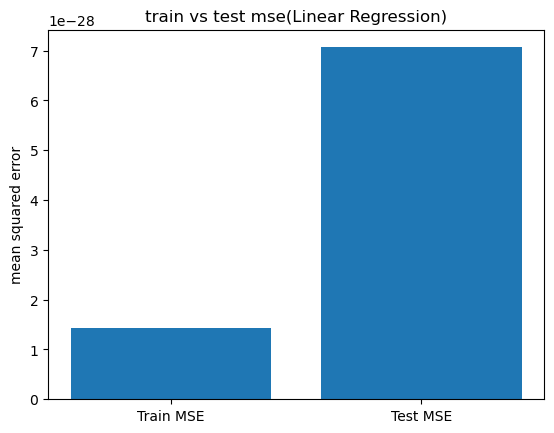

In [72]:
plt.bar(["Train MSE", "Test MSE"], [train_mse_lin, test_mse_lin])
plt.ylabel("mean squared error")
plt.title("train vs test mse(Linear Regression)")
plt.show()

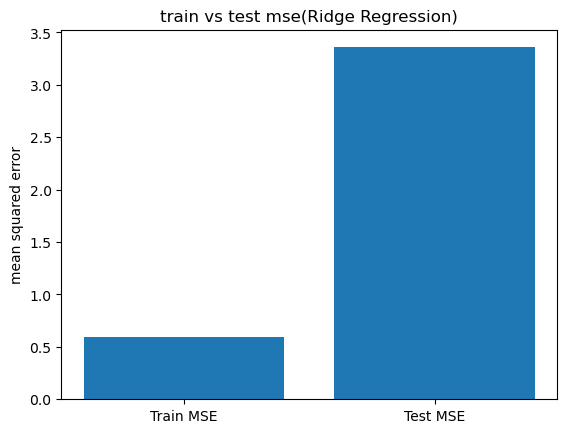

In [74]:
plt.bar(["Train MSE", "Test MSE"], [train_mse_rid, test_mse_rid])
plt.ylabel("mean squared error")
plt.title("train vs test mse(Ridge Regression)")
plt.show()

### Lasso Regularization

In [76]:
lasso = Lasso(alpha=0.5)
lasso.fit(X_train_scaled,y_train)

,alpha,0.5
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [77]:
y_train_pred_lin = linear.predict(X_train_scaled)
y_test_pred_lin = linear.predict(X_test_scaled)

In [79]:
y_train_pred_rid = lasso.predict(X_train_scaled)
y_test_pred_rid = lasso.predict(X_test_scaled)

In [80]:
train_mse_lin = mean_squared_error(y_train, y_train_pred_lin)
test_mse_lin = mean_squared_error(y_test, y_test_pred_lin)
print("train MSE:" , train_mse_lin)
print("test MSE:" , test_mse_lin)

train MSE: 1.4304677748007681e-28
test MSE: 7.068193710780266e-28
